# Introducción al manejo de datos geográficos

# Clase 4

##  Parte 1. NetworkX I
### Elementos iniciales 

#### Algunos conceptos básicos

A modo de inicio, cabe aclarar que no siempre existe una forma única de representar una red. Mientras esta refiere al funcionamiento de un sistema complejo, un `grafo` es la representación matemática de dicha red de relaciones. En ese sentido, contamos con infinidades de esquemas. Dentro de ellos las redes de transporte son uno más, donde generalmente las estaciones se representan por medio de nodos o vértices, y las relaciones entre ellos a través de calles o viajes. De tal manera, un grafo se compone por: 

<img align="center" width="500" height="50" src="../imagenes/nodos_ejes.png" style="float: center; padding: 0 15px">


Otra cuestión relevante a tener en cuenta es que contamos con dos tipos de grafos:

<img align="center" width="700" height="40" src="../imagenes/dir_undir.png" style="float: center; padding: 0 15px">

`NetworkX` es una librería muy útil para operar con este tipo de estructuras. Veamos por qué...

In [ ]:
#!pip install network

Para estar al tanto de la última versión disponible siempre es recomendable chequear en el [repositorio oficial](https://github.com/networkx/networkx). También dejamos el link a la [documentación](https://networkx.org/documentation/stable//reference/introduction.html) de la librería.

In [1]:
!pip show networkx | grep Version

Version: 2.5


## Sección 1: Grafos

### 1.1. Nodos y ejes
Comencemos por armar un grafo no dirigido, distinguiendo nodos, ejes y sus etiquetas.

In [2]:
# importar libreria
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
# se crea el grapho: este es no direccionado
G = nx.Graph()

In [4]:
# se agregan nodos al grapho
G.add_nodes_from([1,2,3])

In [5]:
# devolvemos una lista de nodos
G.nodes()

NodeView((1, 2, 3))

In [6]:
# agregamos los ejes del grafo
G.add_edge(1,2)
G.add_edge(2,3)

In [7]:
# devolvemos una lista de tuplas con los nodos conectados por el eje
G.edges()

EdgeView([(1, 2), (2, 3)])

In [8]:
# se agrega al nodo 1 una label key con el valor blue (es como agregarle un valor a la key de un diccionario)
G.nodes[1]['label'] = 'blue'

Como se puede apreciar, agregamos una etiqueta a uno de nuestros nodos. Esta podría haber sido `blue` o `Estación Lima` (por mencionar algo). De esta manera, podemos obtener una lista de nodos con la metadata asociada. Si prestamos atención, el parámetro `data` nos devuelve un diccionario donde la key es el nodo. Despues contamos con la metadata en otro diccionario donde la llave es la etiqueta y la key el valor. Ahora sólo contamos con una descripción a modo de ejemplo, pero imaginen que dicho valor podría ser la cantidad de pasajeros arrivados a una estación a una hora determinada, o el promedio de tiempo entre una estación y otra.

In [9]:
# Veamos el parametro data
G.nodes(data=True)

NodeDataView({1: {'label': 'blue'}, 2: {}, 3: {}})

In [10]:
# y accedamos a su metadata
list(G.nodes(data=True))[0][1]

{'label': 'blue'}

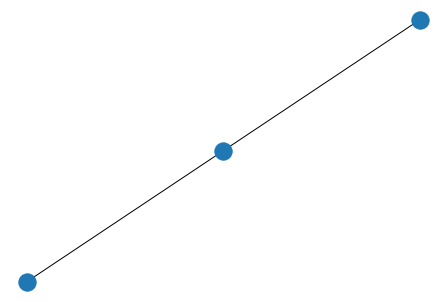

In [11]:
# Así se vería nuestro grafo ...
nx.draw(G)
plt.show()

In [12]:
# Agregamos la misma key al resto de los nodos con algun valor
G.nodes[2]['label'] = 'red'

In [13]:
G.nodes[3]['label'] = 'gren'

In [14]:
G.nodes(data=True)

NodeDataView({1: {'label': 'blue'}, 2: {'label': 'red'}, 3: {'label': 'gren'}})

Supongamos ahora que quisieramos quedarnos solamente con la estación `roja`. Se les ocurre cómo podríamos filtrar elementos dentro de la vista de nodos de un grafo determinado?

In [15]:
# Una recurso bastante utilizado en este tipo de estructuras son las listas por comprensión!
[n for n,d in G.nodes(data=True) if d['label'] == 'red']

[2]

In [17]:
# Agreguemos ahora un par "key:value" a los edge. Para acceder se usa una lista con los nodos que unen el edge
G.edges[1,2]['condicion']=78
G.edges[2,3]['condicion']=92

Hagamos lo mismo que con los nodos, y filtremos ahora los ejes por alguna condición. Fíjense que para iterar sobre los ejes también debemos tener en cuenta los nodos que están uniendo. Por eso la iteración es a partir de una tupla de elementos.

In [18]:
G.edges(data=True)

EdgeDataView([(1, 2, {'condicion': 78}), (2, 3, {'condicion': 92})])

In [19]:
# ejemplo de como filtrar con listas por comprension atributos de un edge
[(u,v) for u,v,d in G.edges(data=True) if d['condicion'] > 90]

[(2, 3)]

### 1.2. Tipos de grafos

In [20]:
# Grafo no direccionado
type(G)

networkx.classes.graph.Graph

In [21]:
# Grafo direccionado
D = nx.DiGraph()
type(D)

networkx.classes.digraph.DiGraph

In [ ]:
# Multi-edge (Directed) graphs 
M = nx.MultiGraph()
type(M)

In [ ]:
MD = nx.MultiDiGraph()
type(MD)

In [ ]:
# WEIGHTS
# Setear el peso de un edge
G.edges[1,2]['weight'] = 2

In [ ]:
# Iterar sobre la metadata de todos los ejes
for u,v,d in G.edges(data=True):
    
    # Check if node 3 is involved:
    if 3 in [u,v]:
        
        # Cambiarle el valor del peso
        d['weight'] = 1.1

In [ ]:
# Como encontrar self loops?

def find_selfloop_node(G):
    '''
    Finds all nodes that have self-loops in the graph G
    '''
    
    nodes_in_selfloops = []
    
    # Iterar sobre todos los ejes de G
    for u,v in G.edges():
        
        # Chequear si el nodo u y el nodo v son iguales:
        if u == v:
            nodes_in_selfloops.append(u)
            
    return nodes_in_selfloops

In [ ]:
# No hay ningun selfloop
len(find_selfloop_node(G))

In [ ]:
# No devuelve error porque esta ok
assert G.number_of_selfloops() == len(find_selfloop_node(G))

# GRAFICOS: Arcplot, Matrix plot y Circle plot 

In [ ]:
#!pip install nxviz

In [ ]:
import nxviz as nv

In [ ]:
# Verficiar que este nxviz en el directorio
#! conda list

In [ ]:
# Arcplot
from nxviz import ArcPlot
ap = nv.ArcPlot(G)

# Draw m to the screen
ap.draw()

# Display the plot
plt.show()

In [ ]:
# Import necessary modules
from nxviz import ArcPlot

# Create the un-customized ArcPlot object: a
a = ArcPlot(G)

# Draw a to the screen
a.draw()

# Display the plot
plt.show()

# Create the customized ArcPlot object: a2
a2 = ArcPlot(G, node_order='label', node_color='label')

# Draw a2 to the screen
a2.draw()

# Display the plot
plt.show()

In [ ]:
# Matrixplot 
m = nv.MatrixPlot(G)

# Draw m to the screen
m.draw()

# Display the plot
plt.show()

In [ ]:
# Convertimos a G en una matriz (1 indica si hay edge entre nodos)
A = nx.to_numpy_matrix(G)

In [ ]:
A

In [ ]:
# Convertimos a G de nuevo al formtato NetworkX como un grafo dirigido: A_conv
A_conv = nx.from_numpy_matrix(A, create_using=nx.DiGraph())

In [ ]:
A_conv

In [ ]:
# Check that the `category` metadata field is lost from each node
for n, d in A_conv.nodes(data=True):
    assert 'category' not in d.keys()

In [ ]:
Ac = nv.MatrixPlot(A_conv)
Ac.draw()
plt.show()

In [ ]:
# Circos plot
from nxviz import CircosPlot 
c = CircosPlot(G)

# Draw c to the screen
c.draw()

# Display the plot
plt.show()

# MEDIDAS DE IMPORTANCIA

## 1) Degree centrality

In [ ]:
# Degree centrality: la cantidad de vecinos que tengo sobre la cantidad que podria tener
G.edges()

In [ ]:
# devuelve los nodos vecinos del especificado en el metodo
list(G.neighbors(2))

In [ ]:
# The key is the node and the value the centrality value
nx.degree_centrality(G)

In [ ]:
# Funcion para obtener nodos segun la cantidad de vecinos
def nodes_with_m_nbrs(G, m):
    """
    Returns all nodes in graph G that have m neighbors.
    """
    nodes = set()

    # Iterate over all nodes in G
    for n in G.nodes():

        # Check if the number of neighbors of n matches m
        if len(list(G.neighbors(n))) == m:

            # Add the node n to the set
            nodes.add(n)

    # Return the nodes with m neighbors
    return nodes

# Compute and print all nodes in T that have 6 neighbors
six_nbrs = nodes_with_m_nbrs(G, 1)
print(six_nbrs)

In [ ]:
# Compute the degree of every node: degrees
degrees = [len(list(G.neighbors(n))) for n in G.nodes()]

# Print the degrees
print(degrees)

In [ ]:
# Devuelve un diccionario donde la key es el nodo y el valor es el degree centrality (Neighbors/possible neighbors). En una red de transporte el nodo mismo es considerado como un self loop que entra en los nodos posibles
deg_cent = nx.degree_centrality(G)

In [ ]:
# Devuelve un histograma con la distribucion del degree centrality
plt.hist(list(deg_cent.values()));

In [ ]:
# Plot a histogram of the degree distribution of the graph
plt.hist([len(list(G.neighbors(n))) for n in G.nodes()])

In [ ]:
# Plot a scatter plot of the centrality distribution and the degree distribution
plt.figure()
plt.scatter(x=degrees, y=list(deg_cent.values()))
plt.show()

In [ ]:
G.nodes()

In [ ]:
# Define path_exists()
def path_exists(G, node1, node2):
    """
    This function checks whether a path exists between two nodes (node1, node2) in graph G.
    """
    visited_nodes = set()

    # Initialize the queue of cells to visit with the first node: queue
    queue = [node1]

    # Iterate over the nodes in the queue
    for node in queue:

        # Get neighbors of the node
        neighbors = G.neighbors(node)

        # Check to see if the destination node is in the set of neighbors
        if node2 in neighbors:
            print('Path exists between nodes {0} and {1}'.format(node1, node2))
            return True
            
        else:
            # Add current node to visited nodes
            visited_nodes.add(node)

            # Add neighbors of current node that have not yet been visited
            queue.extend([n for n in neighbors if n not in visited_nodes])
            print('Path doesn\'t exists between nodes {0} and {1}'.format(node1, node2))
            return visited_nodes
        
        # Check to see if the final element of the queue has been reached
        if node == queue[-1]:
            print('Path does not exist between nodes {0} and {1}'.format(node1, node2))

            # Place the appropriate return statement
            return False


In [ ]:
print(path_exists(G,3,1))

## 2) Degree + Betweenes centrality

In [ ]:
# Betweeness centrality
# M1 es el numero de nodos en el extremo final y m2 la cantidad de nodos en el puente entre ambos
G = nx.barbell_graph(m1=5, m2=1)

# La key es el nodo y el valr es el betweenness centrality
nx.betweenness_centrality(G)

In [ ]:
# Compute the betweenness centrality of G: bet_cen
bet_cen = nx.betweenness_centrality(G)

# Compute the degree centrality of G: deg_cen
deg_cen = nx.degree_centrality(G)

# Create a scatter plot of betweenness centrality and degree centrality
plt.scatter(x=list(bet_cen.values()), y=list(deg_cen.values()))

# Display the plot
plt.show()

In [ ]:
# Define find_nodes_with_highest_deg_cent()
def find_nodes_with_highest_deg_cent(G):

    # Compute the degree centrality of G: deg_cent
    deg_cent = nx.degree_centrality(G)

    # Compute the maximum degree centrality: max_dc
    max_dc = max(list(deg_cent.values()))

    nodes = set()

    # Iterate over the degree centrality dictionary
    for k, v in deg_cent.items():

        # Check if the current value has the maximum degree centrality
        if v == max_dc:

            # Add the current node to the set of nodes
            nodes.add(k)

    return nodes

# Find the node(s) that has the highest degree centrality in G: top_dc
top_dc = find_nodes_with_highest_deg_cent(G)
print(top_dc)

# Write the assertion statement
for node in top_dc:
    assert nx.degree_centrality(G)[node] == max(nx.degree_centrality(G).values())

#### CON ESTA FUNCION SE PODRIA ENCONTAR EL NODO CON MAYOR BETWEENNESS CENTARLITY EN TODA LA RED DE BICIS

In [ ]:
# Define find_node_with_highest_bet_cent()
def find_node_with_highest_bet_cent(G):

    # Compute betweenness centrality: bet_cent
    bet_cent = nx.betweenness_centrality(G)

    # Compute maximum betweenness centrality: max_bc
    max_bc = max(list(bet_cent.values()))

    nodes = set()

    # Iterate over the betweenness centrality dictionary
    for k, v in bet_cent.items():

        # Check if the current value has the maximum betweenness centrality
        if v == max_bc:

            # Add the current node to the set of nodes
            nodes.add(k)

    return nodes

# Use that function to find the node(s) that has the highest betweenness centrality in the network: top_bc
top_bc = find_node_with_highest_bet_cent(G)

# Write an assertion statement that checks that the node(s) is/are correctly identified.
for node in top_bc:
    assert nx.betweenness_centrality(G)[node] == max(nx.betweenness_centrality(G).values())

# PATH FINDING

## Triangulos 

In [ ]:
from itertools import combinations

In [ ]:
# Iterar sobre every pair of nodes and not only every edge
for n1, n2 in combinations(G.nodes(),2):
    print(n1,n2)

In [ ]:
# Define is_in_triangle(): podria servir para encontrar cliques entre las estaciones
def is_in_triangle(G, n):
    """
    Checks whether a node `n` in graph `G` is in a triangle relationship or not.

    Returns a boolean.
    """
    in_triangle = False

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n),2):

        # Check if an edge exists between n1 and n2
        if G.has_edge(n1,n2):
            in_triangle = True
            break
    return in_triangle

In [ ]:
is_in_triangle(G,2)

In [ ]:
#Finding nodes involved in triangles

# Write a function that identifies all nodes in a triangle relationship with a given node.
def nodes_in_triangle(G, n):
    """
    Returns the nodes in a graph `G` that are involved in a triangle relationship with the node `n`.
    """
    triangle_nodes = set([n])

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):

        # Check if n1 and n2 have an edge between them
        if G.has_edge(n1,n2):

            # Add n1 to triangle_nodes
            triangle_nodes.add(n1)

            # Add n2 to triangle_nodes
            triangle_nodes.add(n2)

    return triangle_nodes

# Write the assertion statement
assert len(nodes_in_triangle(G, 1)) == 5

In [ ]:
#Finding open triangles

# Define node_in_open_triangle(G,n)
def node_in_open_triangle(G, n):
    """
    Checks whether pairs of neighbors of node `n` in graph `G` are in an 'open triangle' relationship with node `n`.
    """
    in_open_triangle = False

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n),2):

        # Check if n1 and n2 do NOT have an edge between them
        if not G.has_edge(n1,n2):

            in_open_triangle = True

            break

    return in_open_triangle

# Compute the number of open triangles in T
num_open_triangles = 0

# Iterate over all the nodes in T
for n in G.nodes():

    # Check if the current node is in an open triangle
    if node_in_open_triangle(G,n):

        # Increment num_open_triangles
        num_open_triangles += 1

print(num_open_triangles)

## Cliques y maximal cliques 

In [ ]:
# Finding maximal cliques
Z = nx.barbell_graph(m1=5, m2=1)

nx.find_cliques(Z)

# Lista con los maximal cliques
list(nx.find_cliques(Z))

In [ ]:
nx.find_cliques(Z)

In [ ]:
#Finding all maximal cliques of size "n"

# Define maximal_cliques()
def maximal_cliques(G, size):
    """
    Finds all maximal cliques in graph `G` that are of size `size`.
    """
    mcs = []
    for clique in nx.find_cliques(G):
        if len(clique) == size:
            mcs.append(clique)
    return mcs

# Check that there are 33 maximal cliques of size 3 in the graph T
assert len(maximal_cliques(Z, 3)) == 33


In [ ]:
# En el grafo Z hay dos maximal cliques de 5 nodos
maximal_cliques(Z, 5)

## Subgraphs: analizar subsets de nodos 

In [ ]:
# n es la cantidad de nodos y p la probabilidad que exista un eje entre un par de nodos
E = nx.erdos_renyi_graph(n=20, p=0.2)

In [ ]:
nx.draw(E)

In [ ]:
# Genera un grafo de manera probabilistica. En el caso anterior, 20 nodos con 37 edges
list(E.nodes())

In [ ]:
# Vamos a plotear el nodo 8 y sus vecinos

# Definimos los vecinos del nodo 8
nodes = list(E.neighbors(8))

# se agregan el nodo 8 a la lista con sus vecinos
nodes.append(8)

In [ ]:
# Almacenamos la lista conteniendo el nodo 8 con sus vecinos en un subgrafo
E_ocho = E.subgraph(nodes)

# Vemos sus ejes: tambien devuelve los ejes que tienen los vecinos de 8 (con otros nodos distintos)
E_ocho.edges()

In [ ]:
# Ambos grafos tienen el mismo datatype
E

In [ ]:
E_ocho

In [ ]:
# ploteamos el subgrafo: se le pasa el grafo como objeto
nx.draw(E_ocho, with_labels=True)